The aim of this notebook is to get some hands on practice using ML in python.
I followed the Applied Data Science with Python course found on Coursera.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz as gr
import os
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV \
                        , StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier

fruit_path = "E:\\Tolu\\Documents\\Applied Data Science with Python\\datasets\\fruit_data_with_colors.txt"


In [2]:
pwd = os.getcwd()
os.chdir(os.path.dirname(fruit_path))
fruit_df = pd.read_table(os.path.basename(fruit_path))
os.chdir(pwd)

In [3]:
fr_lookup=dict(zip(fruit_df.fruit_label.unique(), fruit_df.fruit_name.unique()))
fr_lookup

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [4]:
X = fruit_df[['height', 'width', 'mass','color_score']]
y =fruit_df['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

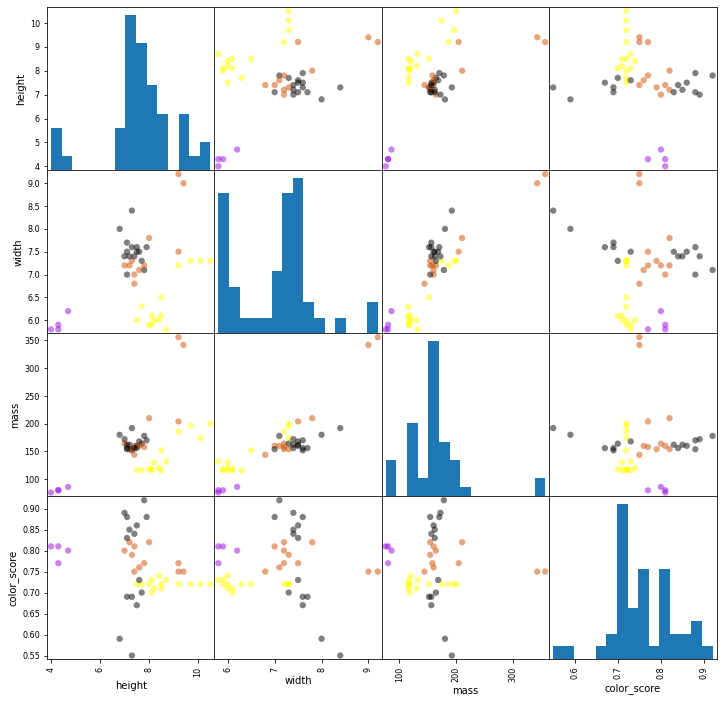

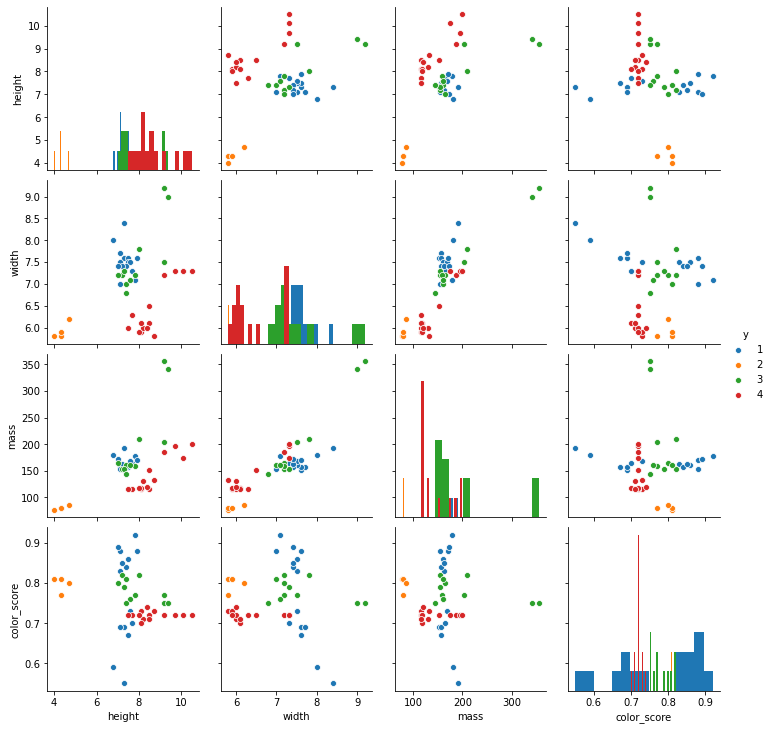

In [5]:
cmap = plt.cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker='o', s=40, figsize=(12,12), cmap=cmap, hist_kwds={'bins':15})

y = y_train.copy()
df =X_train.copy()
df['y'] = y
sns.pairplot(df, hue="y", kind='scatter', diag_kind='hist', diag_kws={'bins':15})

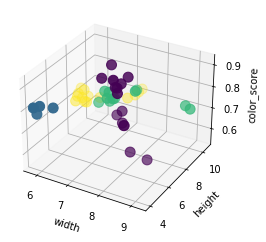

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=y_train, marker='o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
knn.score(X_train, y_train)

0.7954545454545454

In [9]:
fruit_pred = knn.predict([[20, 4.3, 5.5, 0.80]])
fr_lookup[fruit_pred[0]]

E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


'mandarin'

In [10]:
fruit_pred = knn.predict([[170,	7.6, 7.9, 0.88]])
fr_lookup[fruit_pred[0]]

E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


'mandarin'

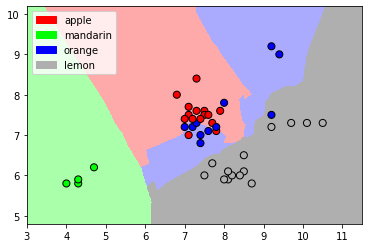

In [11]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches


def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

#plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    

plot_fruit_knn(X_train, y_train, 5, 'uniform')


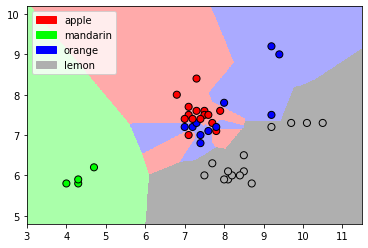

In [12]:
plot_fruit_knn(X_train, y_train, 1, 'uniform')

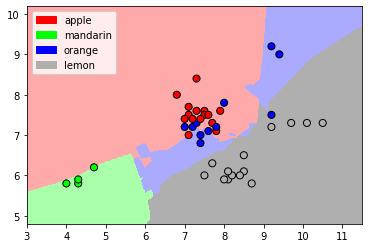

In [13]:
plot_fruit_knn(X_train, y_train, 10, 'uniform')

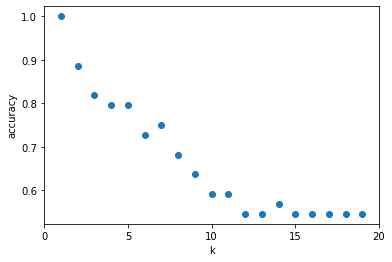

In [14]:
k_range= range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_train, y_train))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);


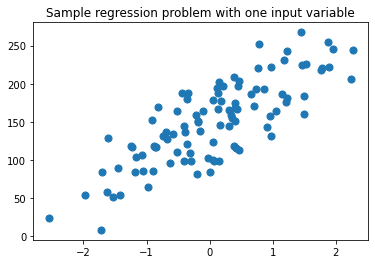

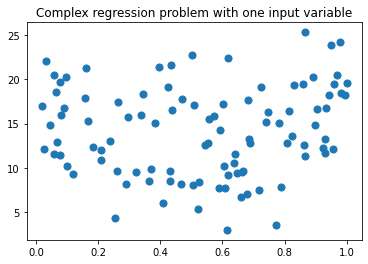

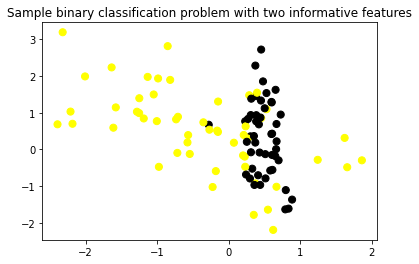

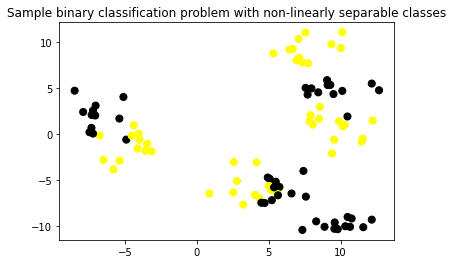

In [15]:
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold =ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary) 
from sklearn.datasets import make_classification
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

In [16]:
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train,y_test = train_test_split(X_R1, y_R1, random_state=0)
knnreg = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
print(f'Training R-Squared score: {knnreg.score(X_train, y_train)}')
print(f'R-squared test score: {knnreg.score(X_test, y_test)}')

Training R-Squared score: 0.7446598214732486
R-squared test score: 0.4246800858234563


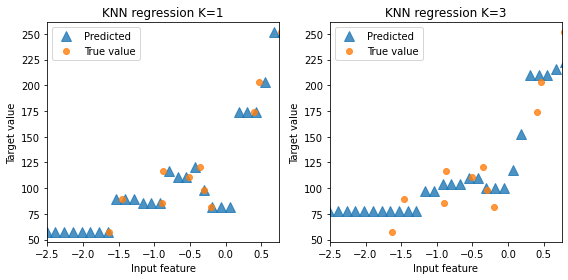

In [17]:
fig, subaxes = plt.subplots(1,2,figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test=train_test_split(X_R1[0::5], y_R1[0::5], random_state=0)

for thisaxis, k in zip(subaxes, [1,3]):
    knnreg = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize=10, label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True value', alpha=0.8)
    thisaxis.set_xlabel("Input feature")
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title(f"KNN regression K={k}")
    thisaxis.legend()
plt.tight_layout()


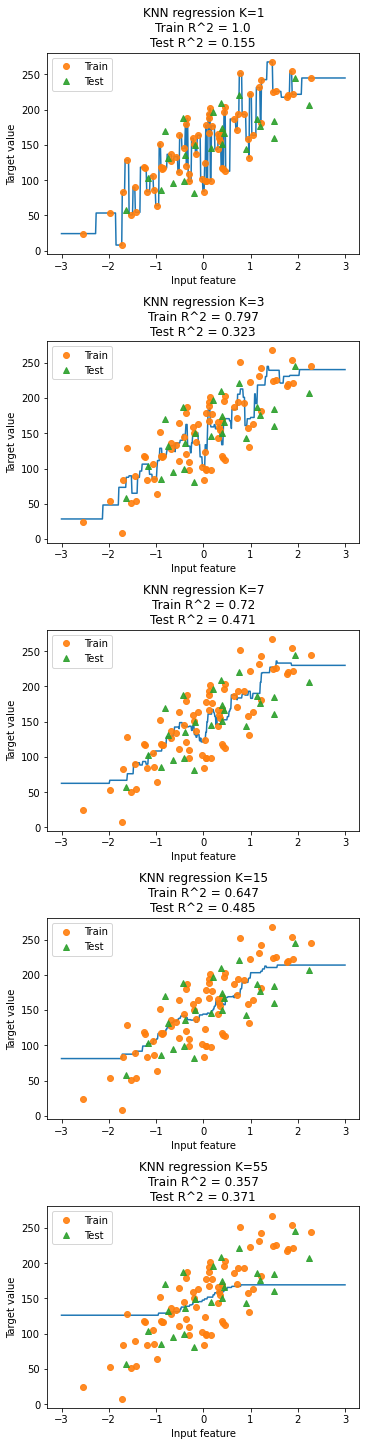

In [18]:
fig, subaxes = plt.subplots(5,1,figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test=train_test_split(X_R1, y_R1, random_state=0)

for thisaxis, k in zip(subaxes, [1,3,7,15,55]):
    knnreg = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score=knnreg.score(X_train,y_train)
    test_score=knnreg.score(X_test,y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', label='Train', alpha=0.9)
    thisaxis.plot(X_test, y_test, '^', label='Test', alpha=0.9)
    thisaxis.set_xlabel("Input feature")
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title(f"KNN regression K={k}\nTrain R^2 = {round(train_score,3)}\nTest R^2 = {round(test_score,3)}")
    thisaxis.legend()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [19]:
# linear models 
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)
print(f'The linear regression model intercept: {linreg.intercept_}')
print(f'coef values: {linreg.coef_}')
print(f'Training R-Squared score: {linreg.score(X_train, y_train)}')
print(f'Testing R-Squared score: {linreg.score(X_test, y_test)}')

The linear regression model intercept: 148.44575345658873
coef values: [45.70870465]
Training R-Squared score: 0.6785950771141656
Testing R-Squared score: 0.4915961593493031


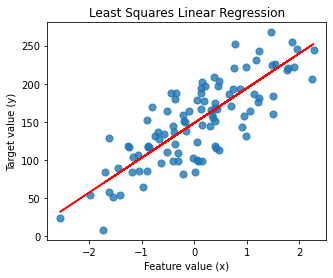

In [20]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_*X_R1+linreg.intercept_, 'r-')
plt.title('Least Squares Linear Regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [21]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test =train_test_split(X_crime, y_crime, random_state=0)

linrid = Ridge(alpha=20.0).fit(X_train, y_train)
print(f'The ridge regression linear model intercept: {linrid.intercept_}')
print(f'coef values: {linrid.coef_}')
print(f'Training R-Squared score: {linrid.score(X_train, y_train)}')
print(f'Testing R-Squared score: {linrid.score(X_test, y_test)}')
print(f'Number of non-zero coef: {np.sum(linrid.coef_!=0)}')

The ridge regression linear model intercept: -3352.4230358463437
coef values: [ 1.95091438e-03  2.19322667e+01  9.56286607e+00 -3.59178973e+01
  6.36465325e+00 -1.96885471e+01 -2.80715856e-03  1.66254486e+00
 -6.61426604e-03 -6.95450680e+00  1.71944731e+01 -5.62819154e+00
  8.83525114e+00  6.79085746e-01 -7.33614221e+00  6.70389803e-03
  9.78505502e-04  5.01202169e-03 -4.89870524e+00 -1.79270062e+01
  9.17572382e+00 -1.24454193e+00  1.21845360e+00  1.03233089e+01
 -3.78037278e+00 -3.73428973e+00  4.74595305e+00  8.42696855e+00
  3.09250005e+01  1.18644167e+01 -2.05183675e+00 -3.82210450e+01
  1.85081589e+01  1.52510829e+00 -2.20086608e+01  2.46283912e+00
  3.29328703e-01  4.02228467e+00 -1.12903533e+01 -4.69567413e-03
  4.27046505e+01 -1.22507167e-03  1.40795790e+00  9.35041855e-01
 -3.00464253e+00  1.12390514e+00 -1.82487653e+01 -1.54653407e+01
  2.41917002e+01 -1.32497562e+01 -4.20113118e-01 -3.59710660e+01
  1.29786751e+01 -2.80765995e+01  4.38513476e+01  3.86590044e+01
 -6.46024046

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()
X_train_sc =scaled.fit_transform(X_train)
X_test_sc = scaled.fit_transform(X_test)
clf = Ridge().fit(X_train_sc, y_train)
r2_score = clf.score(X_test_sc, y_test)
r2_score

0.6135841642135084

In [23]:
linrid = Ridge(alpha=20.0).fit(X_train_sc, y_train)
print(f'The ridge regression linear model intercept: {linrid.intercept_}')
print(f'coef values: {linrid.coef_}')
print(f'Training R-Squared score: {linrid.score(X_train_sc, y_train)}')
print(f'Testing R-Squared score: {linrid.score(X_test_sc, y_test)}')
print(f'Number of non-zero coef: {np.sum(linrid.coef_!=0)}')

The ridge regression linear model intercept: 933.3906385044156
coef values: [  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539   95.24316483 -330.61044265 -442.30179004
 -284.49744001 -258.37150609   17.66431072 -101.70717151  110.64762887
  523.13611718   24.8208959     4.86533322  -30.46775619   -3.51753937
   50.57947231   10.84840601   18.27680946   44.11189865   58.33588176
   67.08698975  -57.93524659  116.1446052    53.81163718   49.01607711
   -7.62262031   55.14288543  -52.08878272  123.39291017   77.12562171
   45.49795317  184.91229771  -91.35721203    1.07975971  234.09267451
 

In [24]:
# trying different values for alpha
for al in [0,1,10,20,50,100,1000]:
    print(f'alpha value is: {al}')
    linrid = Ridge(alpha=al).fit(X_train_sc, y_train)
    print(f'The ridge regression linear model intercept: {linrid.intercept_}')
    # print(f'coef values: {linrid.coef_}')
    print(f'Training R-Squared score: {round(linrid.score(X_train_sc, y_train),4)}')
    print(f'Testing R-Squared score: {round(linrid.score(X_test_sc, y_test),4)}')
    print(f'Number of non-zero coef: {np.sum(linrid.coef_!=0)}')


alpha value is: 0
The ridge regression linear model intercept: 5464190173192453.0
Training R-Squared score: 0.6728
Testing R-Squared score: -5.094545549400832e+25
Number of non-zero coef: 88
alpha value is: 1
The ridge regression linear model intercept: 1104.4416090098393
Training R-Squared score: 0.6602
Testing R-Squared score: 0.6136
Number of non-zero coef: 88
alpha value is: 10
The ridge regression linear model intercept: 1036.6669926316931
Training R-Squared score: 0.6305
Testing R-Squared score: 0.6306
Number of non-zero coef: 88
alpha value is: 20
The ridge regression linear model intercept: 933.3906385044156
Training R-Squared score: 0.6146
Testing R-Squared score: 0.6203
Number of non-zero coef: 88
alpha value is: 50
The ridge regression linear model intercept: 835.947423971209
Training R-Squared score: 0.5844
Testing R-Squared score: 0.5932
Number of non-zero coef: 88
alpha value is: 100
The ridge regression linear model intercept: 809.2573817154316
Training R-Squared score: 

In [25]:
# Lasso regression is best when we know that there are only a few features that have a medium to large effect of the target variable 
# however, ridge regression is better choice when there are many features with small to medium effects on the target variable

from sklearn.linear_model import Lasso
laslin=Lasso(alpha=2.0, max_iter=10000).fit(X_train_sc, y_train)
print(f'The lasso regression linear model intercept: {laslin.intercept_}')
print(f'coef values: {laslin.coef_}')
print(f'Training R-Squared score: {laslin.score(X_train_sc, y_train)}')
print(f'Testing R-Squared score: {laslin.score(X_test_sc, y_test)}')
print(f'Number of non-zero coef: {np.sum(laslin.coef_!=0)}')
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X_crime), laslin.coef_)),key=lambda e: -abs(e[1])):
    if e[1] != 0:
        print(f'\t{e[0]}, {e[1]}')

The lasso regression linear model intercept: 1186.6120619985786
coef values: [    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.69221826    -0.            91.41202242     0.

In [26]:
# trying different alpha values to determine the optimal one for the model
for al in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    laslin=Lasso(alpha=al, max_iter=10000).fit(X_train_sc, y_train)
    # print(f'The lasso regression linear model intercept: {laslin.intercept_}')
    # print(f'coef values: {laslin.coef_}')
    print(f'The alpha value is: {al}')
    print(f'Training R-Squared score: {round(laslin.score(X_train_sc, y_train),4)}')
    print(f'Testing R-Squared score: {round(laslin.score(X_test_sc, y_test),4)}')
    print(f'Number of non-zero coef: {np.sum(laslin.coef_!=0)}')
    print('Features with non-zero weight (sorted by absolute magnitude):')
    # for e in sorted (list(zip(list(X_crime), laslin.coef_)),key=lambda e: -abs(e[1])):
    #     if e[1] != 0:
    #         print(f'\t{e[0]}, {round(e[1],4)}')

The alpha value is: 0.5
Training R-Squared score: 0.6503
Testing R-Squared score: 0.6406
Number of non-zero coef: 35
Features with non-zero weight (sorted by absolute magnitude):
The alpha value is: 1
Training R-Squared score: 0.6411
Testing R-Squared score: 0.6455
Number of non-zero coef: 25
Features with non-zero weight (sorted by absolute magnitude):
The alpha value is: 2
Training R-Squared score: 0.6307
Testing R-Squared score: 0.6422
Number of non-zero coef: 20
Features with non-zero weight (sorted by absolute magnitude):
The alpha value is: 3
Training R-Squared score: 0.6175
Testing R-Squared score: 0.6336
Number of non-zero coef: 17
Features with non-zero weight (sorted by absolute magnitude):
The alpha value is: 5
Training R-Squared score: 0.6009
Testing R-Squared score: 0.6226
Number of non-zero coef: 12
Features with non-zero weight (sorted by absolute magnitude):
The alpha value is: 10
Training R-Squared score: 0.5671
Testing R-Squared score: 0.5926
Number of non-zero coef: 

In [27]:
# commparing polynomial feature transformation between linear regression and ridge regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test=train_test_split(X_F1, y_F1, random_state=0)

linreg=LinearRegression().fit(X_train, y_train)
print(f'The linear regression linear model intercept: {linreg.intercept_}')
# print(f'coef values: {linreg.coef_}')
print(f'Training R-Squared score: {linreg.score(X_train, y_train)}')
print(f'Testing R-Squared score: {linreg.score(X_test, y_test)}')
print(f'Number of non-zero coef: {np.sum(linreg.coef_!=0)}')

linrid = Ridge().fit(X_train, y_train)
print(f'The ridge regression linear model intercept: {linrid.intercept_}')
# print(f'coef values: {linrid.coef_}')
print(f'Training R-Squared score: {linrid.score(X_train, y_train)}')
print(f'Testing R-Squared score: {linrid.score(X_test, y_test)}')
print(f'Number of non-zero coef: {np.sum(linrid.coef_!=0)}')

poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)
X_train, X_test, y_train, y_test=train_test_split(X_F1_poly, y_F1, random_state=0)

linreg=LinearRegression().fit(X_train, y_train)
print(f'The linear regression linear model intercept: {linreg.intercept_}')
# print(f'coef values: {linreg.coef_}')
print(f'Training R-Squared score: {linreg.score(X_train, y_train)}')
print(f'Testing R-Squared score: {linreg.score(X_test, y_test)}')
print(f'Number of non-zero coef: {np.sum(linreg.coef_!=0)}')

linrid = Ridge().fit(X_train, y_train)
print(f'The ridge regression linear model intercept: {linrid.intercept_}')
# print(f'coef values: {linrid.coef_}')
print(f'Training R-Squared score: {linrid.score(X_train, y_train)}')
print(f'Testing R-Squared score: {linrid.score(X_test, y_test)}')
print(f'Number of non-zero coef: {np.sum(linrid.coef_!=0)}')

The linear regression linear model intercept: 1.5425091975373046
Training R-Squared score: 0.7223750207373036
Testing R-Squared score: 0.7221339576925414
Number of non-zero coef: 7
The ridge regression linear model intercept: 2.9631469484239155
Training R-Squared score: 0.7116879922297612
Testing R-Squared score: 0.7214087216409797
Number of non-zero coef: 7
The linear regression linear model intercept: -3.20567439892916
Training R-Squared score: 0.9685996830172934
Testing R-Squared score: 0.804643755050998
Number of non-zero coef: 36
The ridge regression linear model intercept: 5.4180930492552
Training R-Squared score: 0.8257620613919463
Testing R-Squared score: 0.8251115209759516
Number of non-zero coef: 35


A fruit with height 6 and weight 8 an apple
A fruit with height 10 and weight 7 not an apple
Training R-Squared score: 0.7954545454545454
Testing R-Squared score: 0.7333333333333333


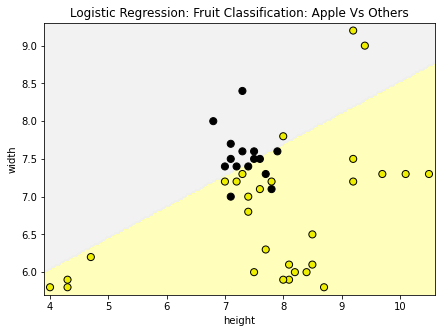

In [28]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)
X_fruits_2d = fruit_df[['height', 'width']]
y_fruits_2d = fruit_df['fruit_label']
fig, subaxes = plt.subplots(1,1, figsize=(7,5))
y_fruit_apple = y_fruits_2d==1
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d.to_numpy(), y_fruit_apple.to_numpy(), random_state=0)

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, "Logistic Regression: Fruit Classification: Apple Vs Others", subaxes)

h=6
w=8
print(f'A fruit with height {h} and weight {w} {"an apple" if clf.predict([[h,w]])[0] else "not an apple"}')
h=10
w=7
print(f'A fruit with height {h} and weight {w} {"an apple" if clf.predict([[h,w]])[0] else "not an apple"}')
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print(f'Training R-Squared score: {clf.score(X_train, y_train)}')
print(f'Testing R-Squared score: {clf.score(X_test, y_test)}')

Training R-Squared score: 0.8133333333333334
Testing R-Squared score: 0.84


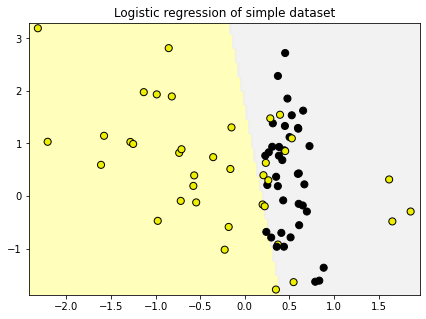

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X_C2, y_C2, random_state=0)
fig, subaxes = plt.subplots(1,1, figsize=(7,5))
clf = LogisticRegression().fit(X_train,y_train)
title = "Logistic regression of simple dataset"
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)
print(f'Training R-Squared score: {clf.score(X_train, y_train)}')
print(f'Testing R-Squared score: {clf.score(X_test, y_test)}')

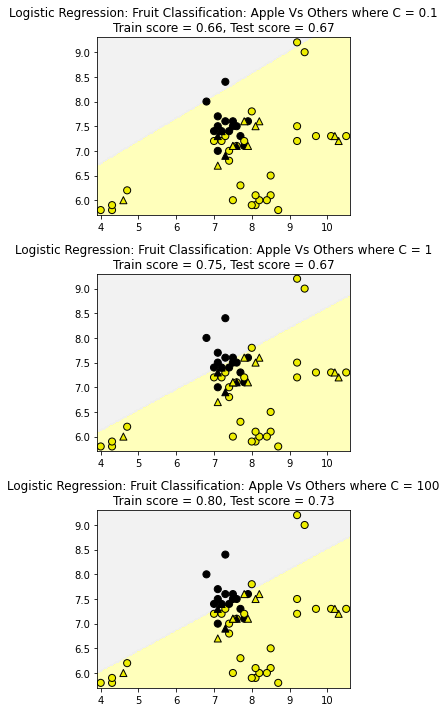

In [30]:
# here we are trying different values of c to control the regularization impact on the logistic model

fig, subaxes = plt.subplots(3,1, figsize=(4,10))
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d.to_numpy(), y_fruit_apple.to_numpy(), random_state=0)
for c, subplot in zip([0.1,1,100],subaxes):
    clf = LogisticRegression(C=c).fit(X_train, y_train)
    title=f"Logistic Regression: Fruit Classification: Apple Vs Others where C = {c}"
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, title, subplot)
plt.tight_layout()

In [31]:
# logistic regression on actual data, here we are using breast cancer data
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
clf = LogisticRegression().fit(X_train,y_train)
print(f'Training R-Squared score: {clf.score(X_train, y_train)}')
print(f'Testing R-Squared score: {clf.score(X_test, y_test)}')

Training R-Squared score: 0.9460093896713615
Testing R-Squared score: 0.9440559440559441


E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


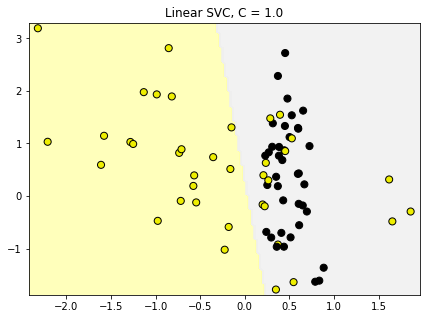

In [32]:
# LSVM
from sklearn.svm import SVC
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

fig, subaxes =plt.subplots(1,1, figsize=(7,5))
this_C =1.0
clf = SVC(kernel="linear", C=this_C).fit(X_train, y_train)
title=f'Linear SVC, C = {this_C}'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

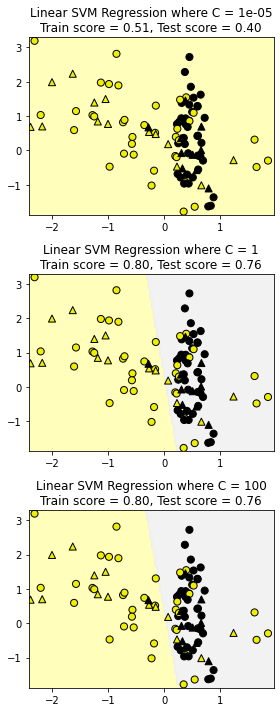

In [33]:
# here we are trying different values of c to control the regularization impact on the logistic model

fig, subaxes = plt.subplots(3,1, figsize=(4,10))
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)
for c, subplot in zip([0.00001,1,100],subaxes):
    clf = SVC(kernel="linear", C=c).fit(X_train, y_train)
    title=f"Linear SVM Regression where C = {c}"
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, title, subplot)
plt.tight_layout()

In [34]:
# linear SVM regression on actual data, here we are using breast cancer data
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
clf = SVC().fit(X_train,y_train)
print(f'Training R-Squared score: {clf.score(X_train, y_train)}')
print(f'Testing R-Squared score: {clf.score(X_test, y_test)}')

Training R-Squared score: 0.903755868544601
Testing R-Squared score: 0.9370629370629371


In [35]:
# now are looking at multi class classification using linear SVM 
# what the classifier here does is create 4 classification models for each type of fruit vs the others and when a new observation is introduced it predicts the classification using each of the models and the model with the highest score will get to classify the observation
from sklearn.svm import LinearSVC
X = fruit_df[['height', 'width']]
y =fruit_df['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LinearSVC(C=5, random_state=0)
clf.fit(X_train,y_train)
print(clf.coef_)
print(clf.intercept_)

[[-0.26249164  0.71176637]
 [-1.63177826  1.15180735]
 [-0.04584849  0.3167164 ]
 [ 1.24319639 -1.65484761]]
[-3.32533881  1.19605769 -2.67722102  1.1578967 ]


E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


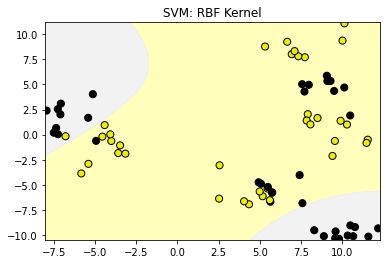

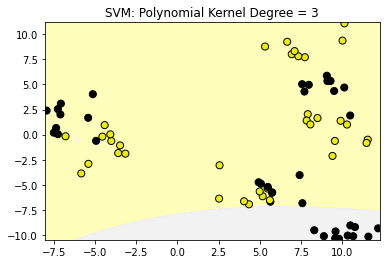

In [36]:
# kernelized SVM for non linear data
from sklearn.svm import SVC
from adspy_shared_utilities import (plot_class_regions_for_classifier)
X_train, X_test, y_train, y_test = train_test_split(X_D2,y_D2, random_state=0)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),X_train,y_train, None,None, "SVM: RBF Kernel")
plot_class_regions_for_classifier(SVC(kernel="poly", degree=3).fit(X_train,y_train), X_train, y_train, None, None, "SVM: Polynomial Kernel Degree = 3")

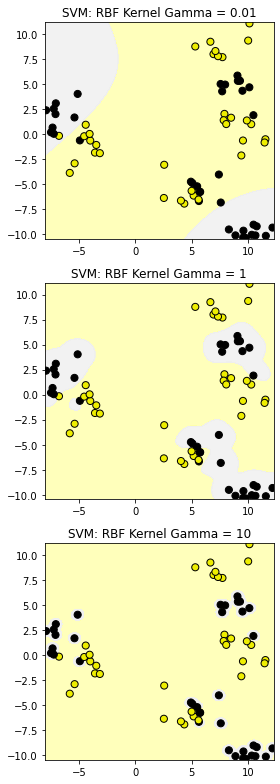

In [37]:
# adjusting gamma value to control the smoothness of the kernel 
from adspy_shared_utilities import (plot_class_regions_for_classifier)
X_train, X_test, y_train, y_test = train_test_split(X_D2,y_D2, random_state=0)
fig, subaxes = plt.subplots(3,1, figsize=(4,11))

for g, subplot in zip([0.01, 1,10], subaxes):
    title= f"SVM: RBF Kernel Gamma = {g}"
    clf=SVC(kernel='rbf', gamma=g).fit(X_train, y_train)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subplot)
    plt.tight_layout()    



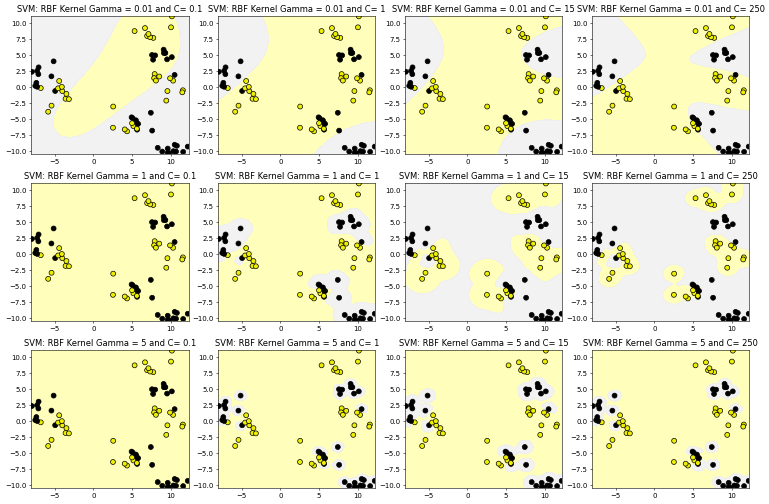

In [38]:
# here we are trying out different values for gamma(kernel smoothness) and C (model regularization)

X_train, X_test, y_train, y_test = train_test_split(X_D2,y_D2, random_state=0)
fig, subaxes = plt.subplots(3,4, figsize=(15,10), dpi=50)

for g, this_axis in zip([0.01,1,5], subaxes):
    for c, subplot in zip([0.1, 1,15,250], this_axis):
        title= f"SVM: RBF Kernel Gamma = {g} and C= {c}"
        clf=SVC(kernel='rbf', gamma=g, C=c).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)    

In [39]:
# using the kernelized SVM to predict breast cancer(the data has not been normalized)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
clf = SVC(kernel='rbf',C=10).fit(X_train,y_train)
print(f'Training R-Squared score: {clf.score(X_train, y_train)}')
print(f'Testing R-Squared score: {clf.score(X_test, y_test)}')

Training R-Squared score: 0.9154929577464789
Testing R-Squared score: 0.9370629370629371


In [40]:
# using the kernelized SVM to predict breast cancer on normalized data

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
X_train_sc=scaled.fit_transform(X_train)
X_test_sc=scaled.fit_transform(X_test)
clf = SVC(kernel='rbf',C=10).fit(X_train_sc,y_train)
print(f'Training R-Squared score: {clf.score(X_train_sc, y_train)}')
print(f'Testing R-Squared score: {clf.score(X_test_sc, y_test)}')


Training R-Squared score: 0.9882629107981221
Testing R-Squared score: 0.8531468531468531


In [41]:
# cross validation

from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=5)
X = X_fruits_2d.to_numpy()
y=y_fruits_2d.to_numpy()
cv_score=cross_val_score(clf, X, y, cv=5)

print(f'Cross-validation scores {cv_score}')
print(f'Mean cross-validation score {np.mean(cv_score)}')

Cross-validation scores [0.75       0.75       0.83333333 0.83333333 0.81818182]
Mean cross-validation score 0.7969696969696971


In [42]:
from sklearn.model_selection import validation_curve

p_range = np.logspace(-3, 3, 4)
train_score, test_score = validation_curve(SVC(), X, y, param_name="gamma",param_range=p_range, cv=3)

print(train_score)
print(test_score)

[[0.46153846 0.43589744 0.425     ]
 [0.84615385 0.71794872 0.75      ]
 [0.92307692 0.8974359  0.925     ]
 [1.         1.         0.975     ]]
[[0.5        0.3        0.31578947]
 [0.85       0.7        0.63157895]
 [0.55       0.85       0.68421053]
 [0.4        0.2        0.36842105]]


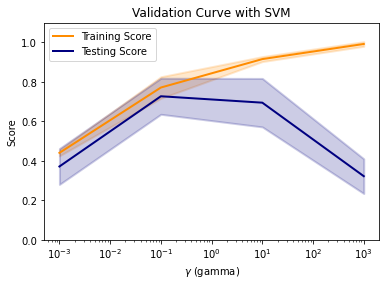

In [43]:
plt.figure()

train_score_m=np.mean(train_score, axis=1)
train_score_s=np.std(train_score, axis=1)
test_score_m=np.mean(test_score, axis=1)
test_score_s=np.std(test_score, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw =2

plt.semilogx(p_range, train_score_m, label="Training Score", color='darkorange', lw=lw)
plt.fill_between(p_range, train_score_m-train_score_s, train_score_m+train_score_s, alpha=0.2, color='darkorange', lw=lw)
plt.semilogx(p_range, test_score_m, label="Testing Score", color='navy', lw=lw)
plt.fill_between(p_range,test_score_m-test_score_s, test_score_m+test_score_s, alpha=0.2, color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

In [44]:
# using decision trees to classify iris dataset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
clf = DecisionTreeClassifier().fit(X_train,y_train)
print(f'Training R-Squared score: {clf.score(X_train, y_train)}')
print(f'Testing R-Squared score: {clf.score(X_test, y_test)}')


Training R-Squared score: 1.0
Testing R-Squared score: 0.9736842105263158


In [45]:
# adjusting the tree depth to see how the accuracy changes
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
clf = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X_train,y_train)
print(f'Training R-Squared score: {clf.score(X_train, y_train)}')
print(f'Testing R-Squared score: {clf.score(X_test, y_test)}')

Training R-Squared score: 0.9821428571428571
Testing R-Squared score: 0.9736842105263158


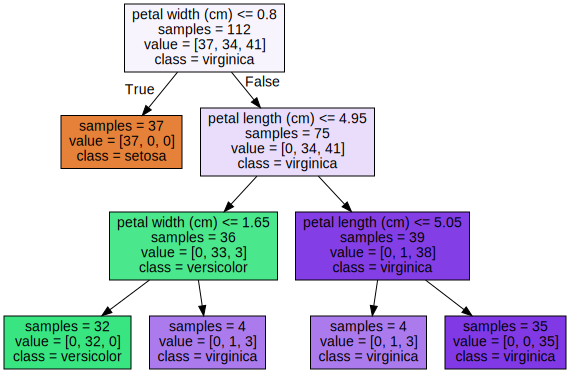

In [46]:
# visualizing the decision tree
from adspy_shared_utilities import plot_decision_tree
plot_decision_tree(clf, iris.feature_names, iris.target_names)

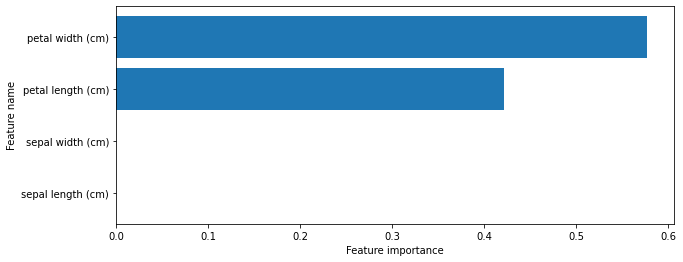

Feature, importances [0.         0.         0.42232109 0.57767891]


In [47]:
# feature importance plot for iris dataset
from adspy_shared_utilities import plot_feature_importances
plt.figure(figsize=(10,4))
plot_feature_importances(clf, iris.feature_names)
plt.show()
print(f'Feature, importances {clf.feature_importances_}')

Training R-Squared score: 0.9647887323943662
Testing R-Squared score: 0.8671328671328671


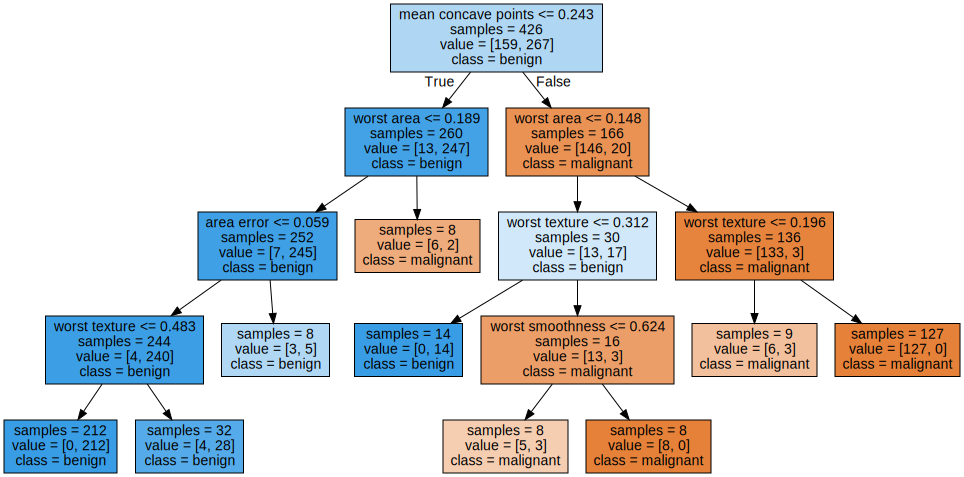

In [48]:
# applying decision trees to the breast cancer dataset

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
X_train_sc=scaled.fit_transform(X_train)
X_test_sc=scaled.fit_transform(X_test)
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, random_state=0).fit(X_train_sc,y_train)
print(f'Training R-Squared score: {clf.score(X_train_sc, y_train)}')
print(f'Testing R-Squared score: {clf.score(X_test_sc, y_test)}')
plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

In [49]:
# Model metrics
from sklearn.datasets import load_digits
# digits dataset is fairly balance across the target values
digits=load_digits()
X,y=digits.data, digits.target

for class_name, class_count in zip(digits.target_names, np.bincount(digits.target)):
    print(class_name, class_count)


0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [50]:
# creating dataset with imbalanced target values

y_b =y.copy()
y_b[y_b!=1]=0

print('original labels:', y[1:30])
print('New imbalanced labels:', y_b[1:30])
np.bincount(y_b)

original labels: [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New imbalanced labels: [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


array([1615,  182], dtype=int64)

In [51]:
# applying svm on the imbalanced data
X_train, X_test, y_train, y_test=train_test_split(X,y_b, random_state=0)
clf=SVC(kernel='rbf', C=1).fit(X_train,y_train)
print(f'Training R-Squared score: {clf.score(X_train, y_train)}')
print(f'Testing R-Squared score: {clf.score(X_test, y_test)}')

Training R-Squared score: 0.9992576095025983
Testing R-Squared score: 0.9955555555555555


In [52]:
# creating a dummy classifier to compare how robust the results above are.
from sklearn.dummy import DummyClassifier
dum = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
y_dum_pred = dum.predict(X_test)
print(f'Training R-Squared score: {dum.score(X_train, y_train)}')
print(f'Testing R-Squared score: {dum.score(X_test, y_test)}')
y_dum_pred

Training R-Squared score: 0.896807720861173
Testing R-Squared score: 0.9044444444444445


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [53]:
# using a linear kernel instead of rbf
clf=SVC(kernel='linear', C=1).fit(X_train,y_train)
print(f'Training R-Squared score: {clf.score(X_train, y_train)}')
print(f'Testing R-Squared score: {clf.score(X_test, y_test)}')

Training R-Squared score: 1.0
Testing R-Squared score: 0.9777777777777777


In [54]:
# confusion matrix using most frequent classifier strategy (dummy classifier)
from sklearn.metrics import confusion_matrix
dum =DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
y_dum_pred = dum.predict(X_test)
conf=confusion_matrix(y_test, y_dum_pred)
print(f'Most frequent class\n(Dummy Classifier)\n{conf}')

Most frequent class
(Dummy Classifier)
[[407   0]
 [ 43   0]]


In [55]:
# confusion matrix using stratified classifier strategy (dummy classifier)

dum =DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_dum_pred = dum.predict(X_test)
conf=confusion_matrix(y_test, y_dum_pred)
print(f'Stratified class\n(Dummy Classifier)\n{conf}')

Stratified class
(Dummy Classifier)
[[366  41]
 [ 37   6]]


In [56]:
# confusion matrix using linear kernel (svm classifier)

clf =SVC(kernel='linear', C=1).fit(X_train, y_train)
clf_pred = clf.predict(X_test)
conf=confusion_matrix(y_test, clf_pred)
print(f'SVM Classifier\n{conf}')

SVM Classifier
[[402   5]
 [  5  38]]


In [57]:
# confusion matrix using logistic regression

clf =LogisticRegression().fit(X_train, y_train)
clf_pred = clf.predict(X_test)
conf=confusion_matrix(y_test, clf_pred)
print(f'Logistic Classifier\n{conf}')

Logistic Classifier
[[401   6]
 [  8  35]]


E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [58]:
# confusion matrix using decision trees max depth of 2
clf =DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
clf_pred = clf.predict(X_test)
conf=confusion_matrix(y_test, clf_pred)
print(f'Decision Tree Classifier\n{conf}')

Decision Tree Classifier
[[400   7]
 [ 17  26]]


In [59]:
# calculating model metrics on decision tree model above
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy: {round(accuracy_score(y_test, clf_pred),2)}')
print(f'Precision: {round(precision_score(y_test, clf_pred),2)}')
print(f'Recall: {round(recall_score(y_test, clf_pred),2)}')
print(f'F1: {round(f1_score(y_test, clf_pred),2)}')

Accuracy: 0.95
Precision: 0.79
Recall: 0.6
F1: 0.68


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf_pred, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [61]:
# decission function classifier
X_train, X_test, y_train,y_test = train_test_split(X,y_b, random_state=0)
clf=LogisticRegression().fit(X_train,y_train).decision_function(X_test)
y_score =list(zip(y_test[0:20], clf[0:20]))
y_score

E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[(0, -29.82877687732674),
 (0, -19.38283761655401),
 (0, -29.19855278975017),
 (0, -21.746325988457418),
 (0, -22.642368941815842),
 (0, -11.805900888010836),
 (1, 6.496004252904241),
 (0, -23.354637687080835),
 (0, -27.543956121504397),
 (0, -26.888209345081055),
 (0, -31.8630701635018),
 (0, -22.48606297577327),
 (0, -25.318039362299285),
 (0, -13.384501917323645),
 (0, -13.565656313302883),
 (0, -13.30833271906063),
 (1, 12.180996960890779),
 (0, -34.362407519658696),
 (0, -13.23155883565005),
 (0, -29.59400073494882)]

In [62]:
# prediction probability function classifier
X_train, X_test, y_train,y_test = train_test_split(X,y_b, random_state=0)
clf=LogisticRegression().fit(X_train,y_train).predict_proba(X_test)
y_score =list(zip(y_test[0:20], clf[0:20,1]))
y_score


E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[(0, 1.1105210633235505e-13),
 (0, 3.820679233281366e-09),
 (0, 2.0855934002023633e-13),
 (0, 3.594931515724493e-10),
 (0, 1.467385121637435e-10),
 (0, 7.460349101559959e-06),
 (1, 0.9984928164574011),
 (0, 7.197964917932154e-11),
 (0, 1.0909675842227677e-12),
 (0, 2.101837097929776e-12),
 (0, 1.4522602536826434e-14),
 (0, 1.7156430283623673e-10),
 (0, 1.0104508936858177e-11),
 (0, 1.5388064782646368e-06),
 (0, 1.2838366285283976e-06),
 (0, 1.6605953427892823e-06),
 (1, 0.9999948730626653),
 (0, 1.192878000676909e-15),
 (0, 1.7931071073054194e-06),
 (0, 1.404393411499654e-13)]

E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


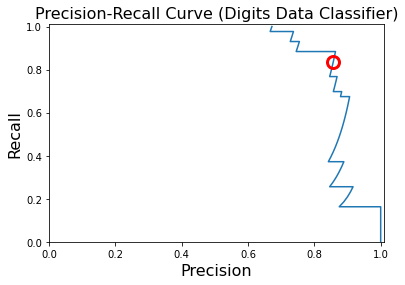

In [63]:
# precision recall curve
from sklearn.metrics import precision_recall_curve

X_train, X_test, y_train,y_test = train_test_split(X,y_b, random_state=0)
clf=LogisticRegression().fit(X_train,y_train).decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, clf)
zero = np.argmin(np.abs(thresholds))
zero_p = precision[zero]
zero_r = recall[zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0,1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(zero_p, zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Precision-Recall Curve (Digits Data Classifier)', fontsize=16)
# plt.axes().set_aspect('equal')
plt.show()

E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


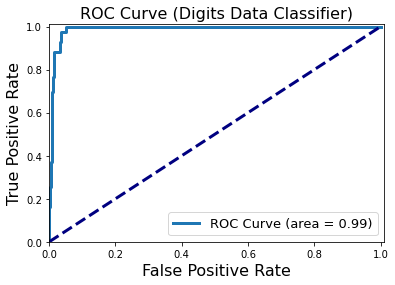

In [64]:
# roc curve 
from sklearn.metrics import roc_curve, auc
X_train, X_test, y_train,y_test = train_test_split(X,y_b, random_state=0)
clf=LogisticRegression().fit(X_train,y_train).decision_function(X_test)
fp, tp, _ =roc_curve(y_test, clf)
roc_auc =auc(fp,tp)

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0,1.01])
plt.plot(fp, tp, lw=3, label=f'ROC Curve (area = {round(roc_auc,3)})')
plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve (Digits Data Classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
# plt.axes().set_aspect('equal')
plt.show()

Text(0.5, 15.0, 'Predicted Label')

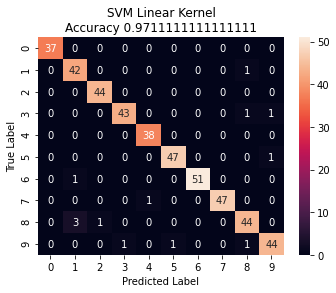

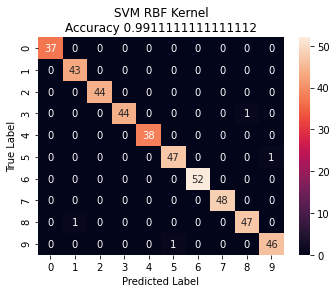

In [65]:
# multiclass model evaluations
X,y=digits.data, digits.target
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=0)

clf =SVC(kernel='linear').fit(X_train,y_train)
clf_pred =clf.predict(X_test)
conf = confusion_matrix(y_test, clf_pred)
df_cm= pd.DataFrame(conf)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title(f'SVM Linear Kernel\nAccuracy {accuracy_score(y_test, clf_pred)}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

clf =SVC(kernel='rbf').fit(X_train,y_train)
clf_pred =clf.predict(X_test)
conf = confusion_matrix(y_test, clf_pred)
df_cm= pd.DataFrame(conf)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title(f'SVM RBF Kernel\nAccuracy {accuracy_score(y_test, clf_pred)}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

In [66]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [67]:
# macro average precision is where each class has equal weight and precision of each class is added together and divided by the total number of class to get the macro average precision
# micro average precision is where each prediction as equal weight regardless of class and the sum of the correctly predicted instance is divided by the total instances
# micro average precision gives class more influence over the precision result, as a class with larger numbers of instances has a greater influence on the calculation and the opposite is true for a class with smaller amount of instances.

print(f'Micro-average precision = {precision_score(y_test, clf_pred, average="micro")} (treats instances equally)')
print(f'Macro-average precision = {precision_score(y_test, clf_pred, average="macro")} (treats classes equally)')

print(f'Micro-average f1 = {f1_score(y_test, clf_pred, average="micro")} (treats instances equally)')
print(f'Macro-average f1 = {f1_score(y_test, clf_pred, average="macro")} (treats classes equally)')

Micro-average precision = 0.9911111111111112 (treats instances equally)
Macro-average precision = 0.991432946486138 (treats classes equally)
Micro-average f1 = 0.9911111111111112 (treats instances equally)
Macro-average f1 = 0.991432652965891 (treats classes equally)


Linear model, coef: [-698.80206267]
Mean square error (dummy): 4965.126471649221
Mean square error (Linear Regression): 4646.740446731375
$R^2$ (dummy): -0.00014359578276068596
$R^2$ (Linear Regression): 0.06399006639614913


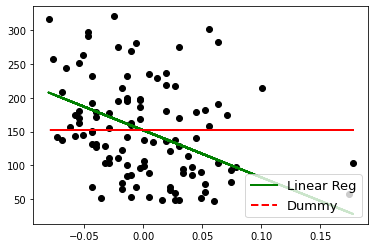

In [68]:
# regression evaluation metrics

from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

dia = datasets.load_diabetes()
X,y= dia.data[:, None, 6], dia.target
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
reg=LinearRegression().fit(X_train, y_train)
dum_reg=DummyRegressor(strategy='mean').fit(X_train,y_train)
reg_pred=reg.predict(X_test)
dum_reg_pred=dum_reg.predict(X_test)

print(f'Linear model, coef: {reg.coef_}')
print(f'Mean square error (dummy): {mean_squared_error(y_test, dum_reg_pred)}')
print(f'Mean square error (Linear Regression): {mean_squared_error(y_test, reg_pred)}')
print(f'$R^2$ (dummy): {r2_score(y_test, dum_reg_pred)}')
print(f'$R^2$ (Linear Regression): {r2_score(y_test, reg_pred)}')

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, reg_pred, color='green', linewidth=2, label='Linear Reg')
plt.plot(X_test, dum_reg_pred, color='red', linestyle='dashed', linewidth=2, label= "Dummy")
plt.legend(loc='lower right', fontsize=13)

In [69]:
# using model metrics in model selection 
from sklearn.model_selection import cross_val_score
X,y=digits.data, digits.target==1
clf=SVC(kernel='linear', C=1)

print(f'Cross-validation (accuracy) {cross_val_score(clf, X,y, cv=5)}')
print(f'Cross-validation (AUC) {cross_val_score(clf, X,y, cv=5, scoring="roc_auc")}')
print(f'Cross-validation (recall) {cross_val_score(clf, X,y, cv=5, scoring="recall")}')

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


In [70]:
# grid search 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
X,y=digits.data, digits.target==1
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
clf=SVC(kernel='rbf')
gr_val ={'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
gr_clf_acc=GridSearchCV(clf, param_grid=gr_val)
gr_clf_acc.fit(X_train, y_train)
y_dec_fn_sco_acc=gr_clf_acc.decision_function(X_test)

print(f'Grid best parameter (max. accuracy): {gr_clf_acc.best_params_}')
print(f'Grid best score (accuracy): {gr_clf_acc.best_score_}')

# now using AUC has scoring metric
gr_clf_auc=GridSearchCV(clf, param_grid=gr_val, scoring='roc_auc')
gr_clf_auc.fit(X_train, y_train)
y_dec_fn_sco_auc=gr_clf_auc.decision_function(X_test)

# print(f'Test set AUC: {roc_auc_score(y_test, y_dec_fn_sco_auc)}')
print('Test set AUC: ', roc_auc_score(y_test, y_dec_fn_sco_auc))
print(f'Grid best parameter (max. AUC): {gr_clf_auc.best_params_}')
print(f'Grid best score (AUC): {gr_clf_auc.best_score_}')

Grid best parameter (max. accuracy): {'gamma': 0.001}
Grid best score (accuracy): 0.9985157648354676
Test set AUC:  0.99982858122393
Grid best parameter (max. AUC): {'gamma': 0.001}
Grid best score (AUC): 1.0


In [71]:
# checking to see the list of available scoring methods
from sklearn.metrics._scorer import SCORERS
print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


Grid best parameter (max precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.5333795518207283


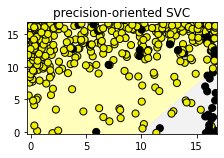

Grid best parameter (max recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9285714285714285


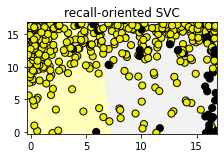

Grid best parameter (max f1): {'class_weight': {1: 3}}
Grid best score (f1): 0.5490346722714137


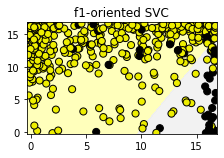

Grid best parameter (max roc_auc): {'class_weight': {1: 4}}
Grid best score (roc_auc): 0.8941876145007039


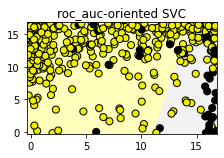

In [72]:
# optimizing classifier by using different evaluation metrics with a grid search for class_weight parameter in SVM
from adspy_shared_utilities import plot_class_regions_for_classifier
X,y=digits.data, digits.target==1
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

jitter_del =0.25
X_tw_train =X_train[:, [20,59]]+np.random.rand(X_train.shape[0],2)-jitter_del
X_tw_test = X_test[:, [20,59]]+np.random.rand(X_test.shape[0],2)-jitter_del

clf=SVC(kernel='linear').fit(X_tw_train, y_train)
gr_val={'class_weight': ['balanced', {1:2}, {1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure()

for i, eval_m in enumerate(('precision','recall', 'f1', 'roc_auc')):
    gr_clf_cust = GridSearchCV(clf, param_grid=gr_val, scoring=eval_m)
    gr_clf_cust.fit(X_tw_train,y_train)
    print(f'Grid best parameter (max {eval_m}): {gr_clf_cust.best_params_}')
    print(f'Grid best score ({eval_m}): {gr_clf_cust.best_score_}')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(gr_clf_cust, X_tw_test, y_test, None, None, None, plt.subplot(2,2, i+1))
    plt.title(f'{eval_m}-oriented SVC')
    plt.tight_layout()
    plt.show()

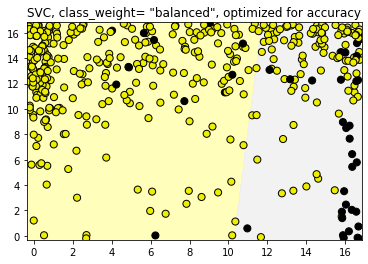

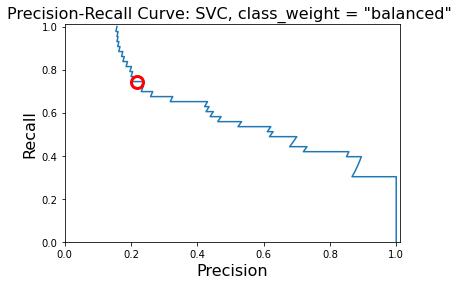

At Zero threshold, precision: 0.2191780821917808, recall: 0.7441860465116279


In [73]:
# creating a precision recall curve
from sklearn.metrics import precision_recall_curve
X,y=digits.data, digits.target==1
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

jitter_del =0.25
X_tw_train =X_train[:, [20,59]]+np.random.rand(X_train.shape[0],2)-jitter_del
X_tw_test = X_test[:, [20,59]]+np.random.rand(X_test.shape[0],2)-jitter_del
clf=SVC(kernel='linear', class_weight='balanced').fit(X_tw_train, y_train)
y_score=clf.decision_function(X_tw_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_score)
zero = np.argmin(np.abs(thresholds))
zero_p = precision[zero]
zero_r = recall[zero]
title=('SVC, class_weight= "balanced", optimized for accuracy')
plot_class_regions_for_classifier(clf,X_tw_test, y_test,None, None,title)
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0,1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(zero_p, zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Precision-Recall Curve: SVC, class_weight = "balanced" ', fontsize=16)
# plt.axes().set_aspect('equal')
plt.show()
print(f'At Zero threshold, precision: {zero_p}, recall: {zero_r}')

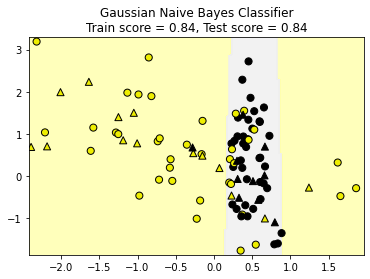

In [74]:
# naive bayes classifier

from sklearn.naive_bayes import GaussianNB 
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

clf = GaussianNB().fit(X_train,y_train)
plot_class_regions_for_classifier(clf, X_train, y_train, X_test,y_test, "Gaussian Naive Bayes Classifier")

In [75]:
# applying NB classifier to real dataset
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = GaussianNB().fit(X_train,y_train)
print('Breast Cancer Data')
print(f'Accuracy of GNB classifier on train is: {clf.score(X_train,y_train)}')
print(f'Accuracy of GNB classifier on test is: {clf.score(X_test, y_test)}')

Breast Cancer Data
Accuracy of GNB classifier on train is: 0.9507042253521126
Accuracy of GNB classifier on test is: 0.9370629370629371


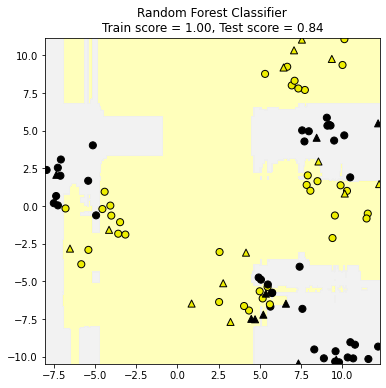

In [76]:
# ensembles methods random forest

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

X_train, X_test, y_train,y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes =plt.subplots(1,1, figsize=(6,6))
clf=RandomForestClassifier().fit(X_train, y_train)
title = "Random Forest Classifier"
plot_class_regions_for_classifier_subplot(clf,X_train,y_train, X_test, y_test, title, subaxes)
plt.show()


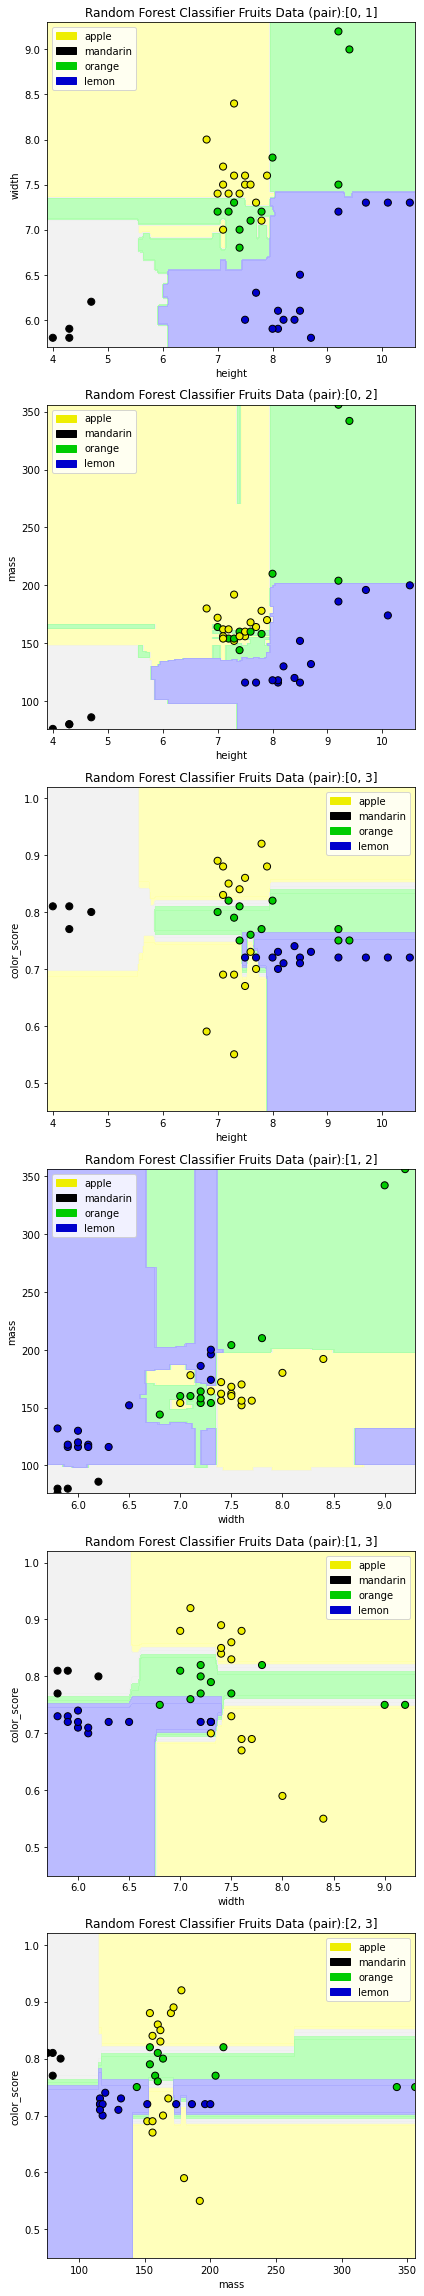

RF for Fruit Dataset
Accuracy of RF classifier on training set: 1.0
Accuracy of RF classifier on testing set: 0.8


In [77]:
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X = fruit_df[feature_names_fruits]
y =fruit_df['fruit_label']
X_train, X_test, y_train,y_test = train_test_split(X.to_numpy(), y.to_numpy(), random_state=0)
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']
fig, subaxes =plt.subplots(6,1, figsize=(6,32))
pair_lst =[[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]

for pair, axis in zip(pair_lst, subaxes):
    X=X_train[:,pair]
    y=y_train
    clf=RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf,X,y, None, None,  f"Random Forest Classifier Fruits Data (pair):{pair}",axis, target_names_fruits)
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
plt.tight_layout()
plt.show()

clf=RandomForestClassifier(n_estimators=10, random_state=0).fit(X_train,y_train)

print(f'RF for Fruit Dataset')
print(f'Accuracy of RF classifier on training set: {clf.score(X_train, y_train)}')
print(f'Accuracy of RF classifier on testing set: {clf.score(X_test, y_test)}')

In [78]:
# using rf on real data (breast cancer dataset)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = RandomForestClassifier(max_features=8, random_state=0).fit(X_train,y_train)
print('Breast Cancer Data')
print(f'Accuracy of RF classifier on train is: {clf.score(X_train,y_train)}')
print(f'Accuracy of RF classifier on test is: {clf.score(X_test, y_test)}')


Breast Cancer Data
Accuracy of RF classifier on train is: 1.0
Accuracy of RF classifier on test is: 0.972027972027972


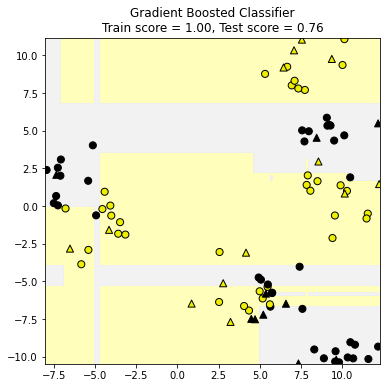

In [79]:
# ensembles methods gradient boosted decision trees
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train,y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes =plt.subplots(1,1, figsize=(6,6))
clf=GradientBoostingClassifier().fit(X_train, y_train)
title = "Gradient Boosted Classifier"
plot_class_regions_for_classifier_subplot(clf,X_train,y_train, X_test, y_test, title, subaxes)
plt.show()

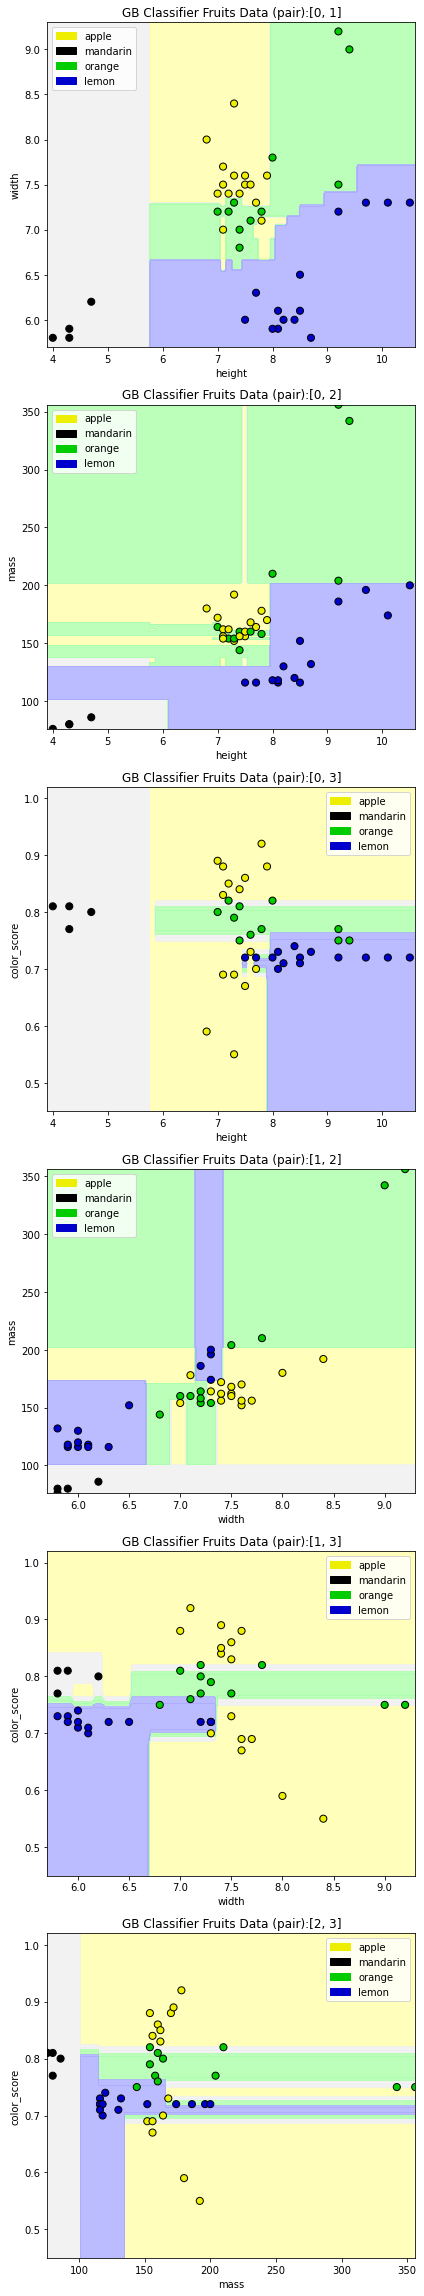

RF for Fruit Dataset
Accuracy of GB classifier on training set: 1.0
Accuracy of GB classifier on testing set: 0.8


In [80]:
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X = fruit_df[feature_names_fruits]
y =fruit_df['fruit_label']
X_train, X_test, y_train,y_test = train_test_split(X.to_numpy(), y.to_numpy(), random_state=0)
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']
fig, subaxes =plt.subplots(6,1, figsize=(6,32))
pair_lst =[[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]

for pair, axis in zip(pair_lst, subaxes):
    X=X_train[:,pair]
    y=y_train
    clf=GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf,X,y, None, None,  f"GB Classifier Fruits Data (pair):{pair}",axis, target_names_fruits)
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
plt.tight_layout()
plt.show()

clf=GradientBoostingClassifier().fit(X_train,y_train)

print(f'RF for Fruit Dataset')
print(f'Accuracy of GB classifier on training set: {clf.score(X_train, y_train)}')
print(f'Accuracy of GB classifier on testing set: {clf.score(X_test, y_test)}')

In [81]:
# gradient boosted classifier on real dataset (breast cancer)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = GradientBoostingClassifier(random_state=0).fit(X_train,y_train)
print('Breast Cancer Data')
print(f'Accuracy of GB classifier on train is: {clf.score(X_train,y_train)}')
print(f'Accuracy of GB classifier on test is: {clf.score(X_test, y_test)}')

clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=0).fit(X_train,y_train)
print('Breast Cancer Data')
print(f'Accuracy of GB classifier on train is: {clf.score(X_train,y_train)}')
print(f'Accuracy of GB classifier on test is: {clf.score(X_test, y_test)}')

Breast Cancer Data
Accuracy of GB classifier on train is: 1.0
Accuracy of GB classifier on test is: 0.965034965034965
Breast Cancer Data
Accuracy of GB classifier on train is: 0.9741784037558685
Accuracy of GB classifier on test is: 0.965034965034965


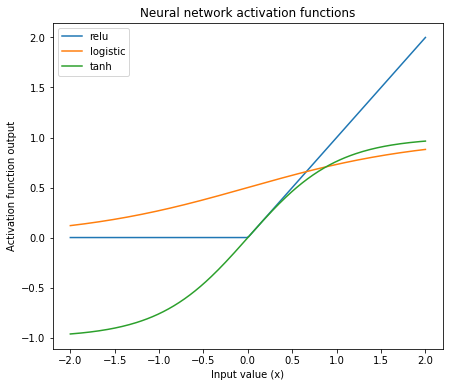

In [82]:
# neural networks

xrange=np.linspace(-2,2,200)
plt.figure(figsize=(7,6))
plt.plot(xrange, np.maximum(xrange,0), label='relu')
plt.plot(xrange,1/(1+np.exp(-xrange)),label='logistic')
plt.plot(xrange,np.tanh(xrange),label='tanh')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')
plt.show()


E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


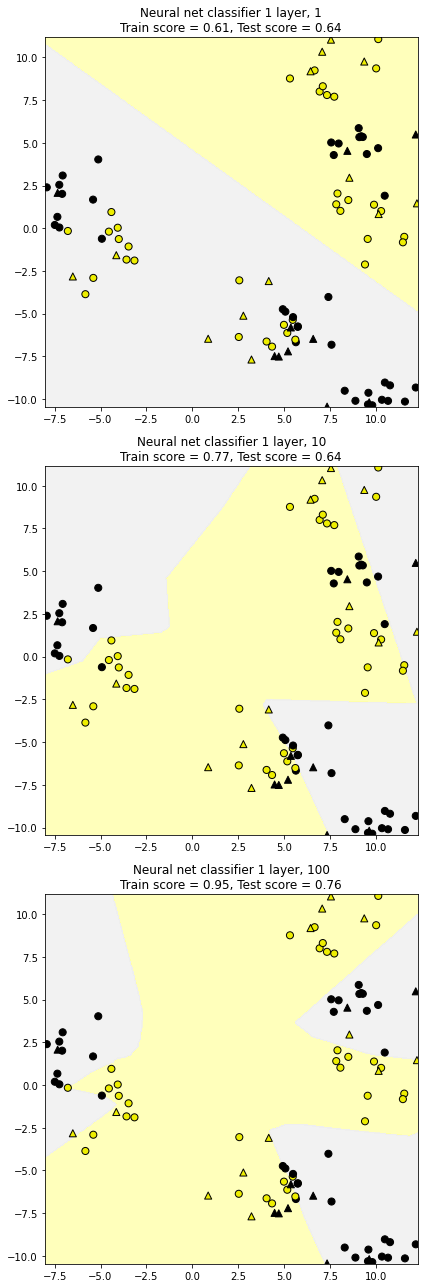

In [83]:
# neural net classifier with 1 hidden layer
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train,y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3,1,figsize=(6,18))
for units, axis in zip([1,10,100], subaxes):
    clf=MLPClassifier(hidden_layer_sizes=[units], solver='lbfgs', random_state=0).fit(X_train, y_train)
    title=f'Neural net classifier 1 layer, {units}'
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,y_test, title, axis)
    plt.tight_layout()


E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


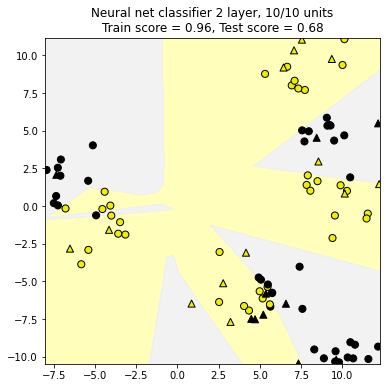

In [84]:
# neural net classifier with 2 hidden layer
X_train, X_test, y_train,y_test = train_test_split(X_D2, y_D2, random_state=0)
fig, subaxes =plt.subplots(1,1, figsize=(6,6))
clf=MLPClassifier(hidden_layer_sizes=[10,10], solver='lbfgs', random_state=0).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, 'Neural net classifier 2 layer, 10/10 units',subaxes)

E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

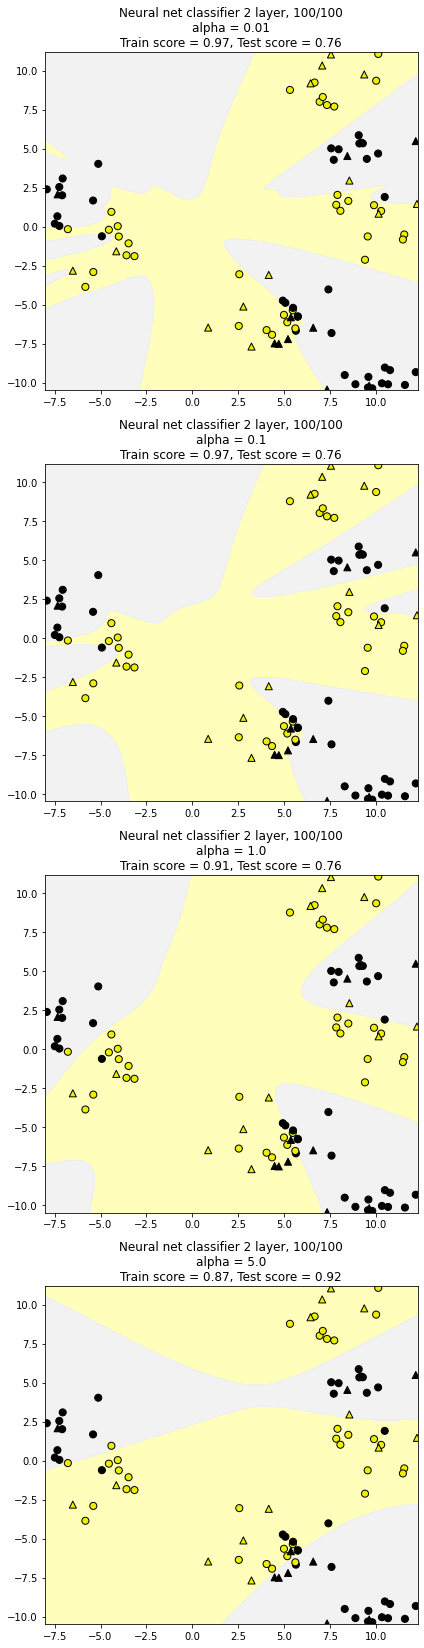

In [85]:
# trying different values for the regularization parameter alpha
X_train, X_test, y_train,y_test = train_test_split(X_D2, y_D2, random_state=0)
fig, subaxes = plt.subplots(4,1,figsize=(6,23))
for alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    clf=MLPClassifier(hidden_layer_sizes=[100,100], solver='lbfgs', activation='tanh', alpha=alpha, random_state=0).fit(X_train, y_train)
    title=f'Neural net classifier 2 layer, 100/100\nalpha = {alpha}'
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,y_test, title, axis)
    plt.tight_layout()

E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

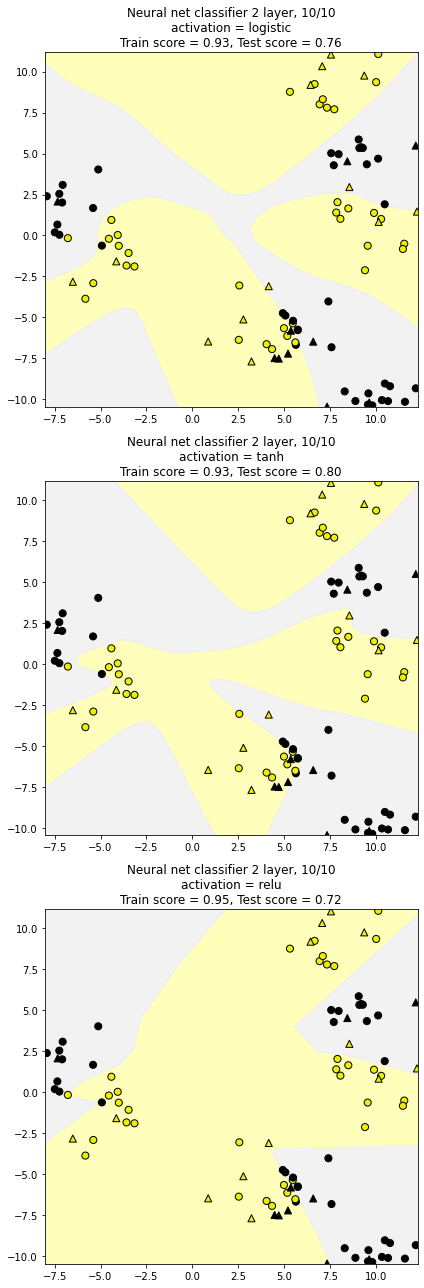

In [86]:
# trying different values for the activation parameter
X_train, X_test, y_train,y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3,1,figsize=(6,18))
for act, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    clf=MLPClassifier(hidden_layer_sizes=[10,10], solver='lbfgs',activation=act, alpha=0.1, random_state=0).fit(X_train, y_train)
    title=f'Neural net classifier 2 layer, 10/10\nactivation = {act}'
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,y_test, title, axis)
    plt.tight_layout()

E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

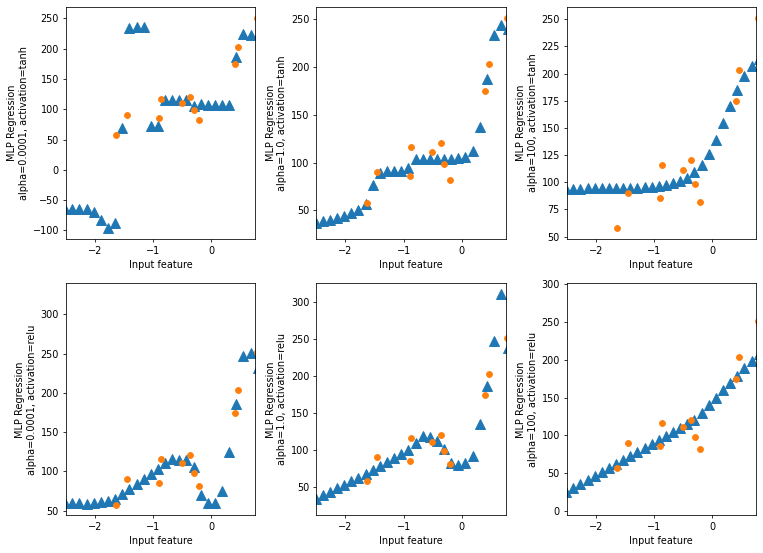

In [87]:
# neural network regressor models
from sklearn.neural_network import MLPRegressor
fig, subaxes=plt.subplots(2,3, figsize=(11,8),dpi=70)
X_pred_in=np.linspace(-3,3,50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state=0)

for row, act in zip(subaxes, ['tanh','relu']):
    for alpha, axis in zip([0.0001,1.0,100], row):
        clf=MLPRegressor(hidden_layer_sizes=[100,100],activation=act, alpha=alpha, solver='lbfgs').fit(X_train, y_train)
        y_pred_out =clf.predict(X_pred_in)
        axis.set_xlim([-2.5,0.75])
        axis.plot(X_pred_in, y_pred_out, '^', markersize=10)
        axis.plot(X_train,y_train, 'o')
        axis.set_xlabel('Input feature')
        axis.set_ylabel(f'MLP Regression\nalpha={alpha}, activation={act}')
        plt.tight_layout()

In [88]:
# nn classifier on real data (breast cancer dataset)
scaled=MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)
X_train_sc=scaled.fit_transform(X_train)
X_test_sc=scaled.fit_transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=[100,100], alpha=5.0, random_state=0, solver='lbfgs').fit(X_train_sc,y_train)
print('Breast Cancer Data')
print(f'Accuracy of NN classifier on train is: {clf.score(X_train_sc,y_train)}')
print(f'Accuracy of NN classifier on test is: {clf.score(X_test_sc, y_test)}')


Breast Cancer Data
Accuracy of NN classifier on train is: 0.9835680751173709
Accuracy of NN classifier on test is: 0.8951048951048951


In [89]:
# unsupervised learning methods
# applying PCA to breast cancer dataset
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_norm= StandardScaler().fit_transform(X_cancer)
pca=PCA(n_components=2).fit(X_norm)
X_pca=pca.transform(X_norm)
print(X_cancer.shape, X_pca.shape)



(569, 30) (569, 2)


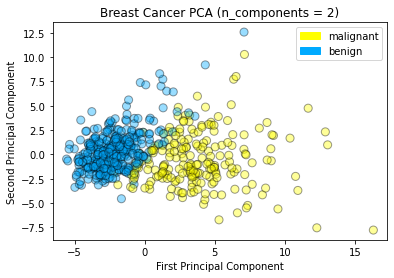

In [90]:
# now plotting the new dimesion reduced dataset
from adspy_shared_utilities import plot_labelled_scatter
xlabel='First Principal Component'
ylabel='Second Principal Component'
title='Breast Cancer PCA (n_components = 2)'
plot_labelled_scatter(X_pca, y_cancer,['malignant', 'benign'], title, xlabel, ylabel)



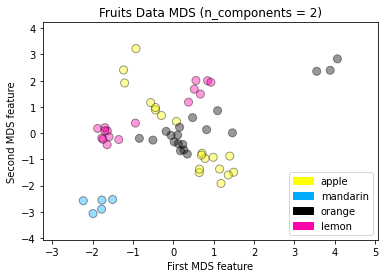

In [126]:
# unsupervised learning methods
# applying manifold method (MDS) to fruits dataset
from sklearn.manifold import MDS
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X = fruit_df[['mass','width','height', 'color_score']]
y = (fruit_df[['fruit_label']]-1).to_numpy()
X_norm= StandardScaler().fit_transform(X)
mds=MDS(n_components=2)
X_mds=mds.fit_transform(X_norm)
xlabel='First MDS feature'
ylabel='Second MDS feature'
title='Fruits Data MDS (n_components = 2)'
plot_labelled_scatter(X_mds, y,['apple', 'mandarin', 'orange', 'lemon'], title, xlabel, ylabel)

E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


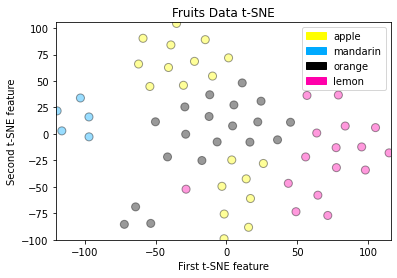

In [127]:
# unsupervised learning methods
# applying manifold method (t-SNE) to fruits dataset
# t-SNE does not do a good job defining clusters for the fruits
from sklearn.manifold import TSNE
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X = fruit_df[['mass','width','height', 'color_score']]
y = (fruit_df[['fruit_label']]-1).to_numpy()
X_norm= StandardScaler().fit_transform(X)
cl=TSNE(random_state=0)
X_cl=cl.fit_transform(X_norm)
xlabel='First t-SNE feature'
ylabel='Second t-SNE feature'
title='Fruits Data t-SNE'
plot_labelled_scatter(X_cl, y,['apple', 'mandarin', 'orange', 'lemon'], title, xlabel, ylabel)

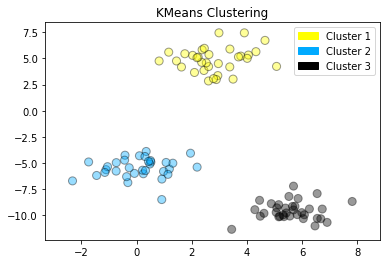

In [128]:
# clustering methods
# kmeans cluster
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X,y=make_blobs(random_state=10)
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
title='KMeans Clustering'
plot_labelled_scatter(X,kmeans.labels_, ['Cluster 1','Cluster 2','Cluster 3'], title)

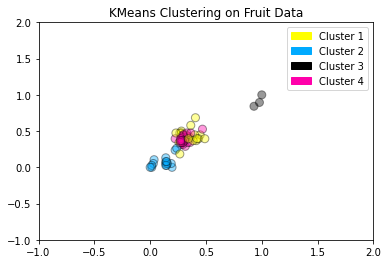

In [130]:
# applying kmeans to the fruits dataset
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X = fruit_df[['mass','width','height', 'color_score']]
y = (fruit_df[['fruit_label']]-1).to_numpy()
X_norm= MinMaxScaler().fit_transform(X)

cl=KMeans(n_clusters=4, random_state=0)
cl.fit(X_norm)
title='KMeans Clustering on Fruit Data'
plot_labelled_scatter(X_norm,cl.labels_, ['Cluster 1','Cluster 2','Cluster 3','Cluster 4'], title)

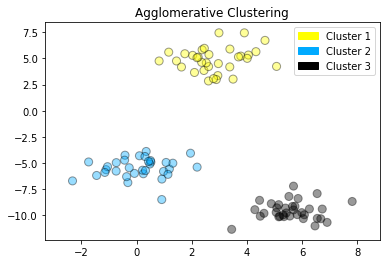

In [131]:
# hierarchical clustering (agglomerative approach)
from sklearn.cluster import AgglomerativeClustering
X,y=make_blobs(random_state=10)
cl=AgglomerativeClustering(n_clusters=3)
cl_label= cl.fit_predict(X)
title='Agglomerative Clustering'
plot_labelled_scatter(X,cl_label, ['Cluster 1','Cluster 2','Cluster 3'], title)

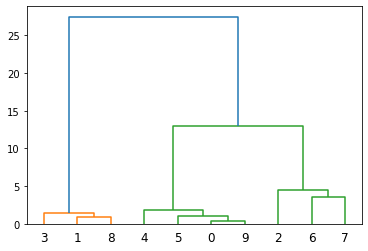

In [132]:
from scipy.cluster.hierarchy import ward, dendrogram
X,y=make_blobs(random_state=10, n_samples=10)
plt.figure()
dendrogram(ward(X))
plt.show()


Clustering membership  values:
[ 0  1  2  2  0  0  0  1  0  1  1  1  2  2  0  0  2  2  2  1 -1  1  0  2
  1]


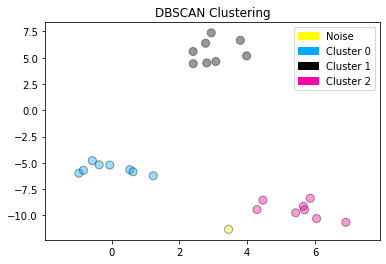

In [134]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN
X,y=make_blobs(random_state=10,n_samples=25)
cl=DBSCAN(eps=2, min_samples=2)
cl_label= cl.fit_predict(X)
print(f'Clustering membership  values:\n{cl_label}')
title='DBSCAN Clustering'
plot_labelled_scatter(X,cl_label+1, ['Noise','Cluster 0','Cluster 1','Cluster 2'], title)


In [ ]:
# testing